# Support Vector Machines Project

### For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors).

### We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full

##### Here are what the columns represent:
##### credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
##### purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
##### int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
##### installment: The monthly installments owed by the borrower if the loan is funded.
##### log.annual.inc: The natural log of the self-reported annual income of the borrower.
##### dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
##### fico: The FICO credit score of the borrower.
##### days.with.cr.line: The number of days the borrower has had a credit line.
##### revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
##### revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
##### inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
##### delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
##### pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Get the Data

In [2]:
#Saving loan_data.csv as a dataframe called loans
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA

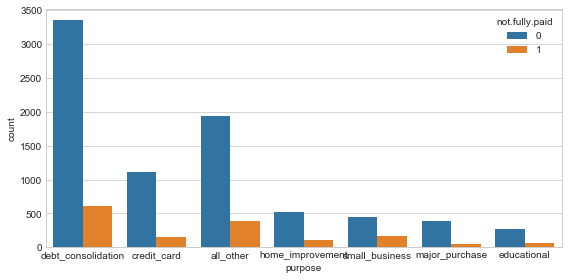

In [3]:
#Creating a barplot of purpose counts, colored by not.fully.paid
plt.figure(figsize=(8,4))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)
plt.tight_layout()

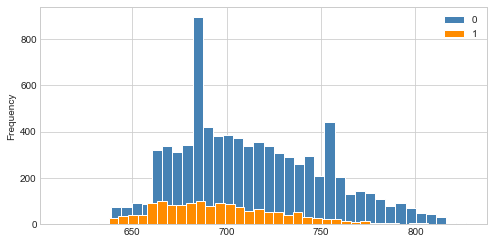

In [4]:
#Creating a histogram of fico scores colored by not.fully.paid
plt.figure(figsize=(8,4))
loans[loans['not.fully.paid']==0]['fico'].plot.hist(bins=40,color="steelblue",edgecolor="white",label="0")
loans[loans['not.fully.paid']==1]['fico'].plot.hist(bins=40,color="darkorange",edgecolor="white",label="1")
plt.legend()

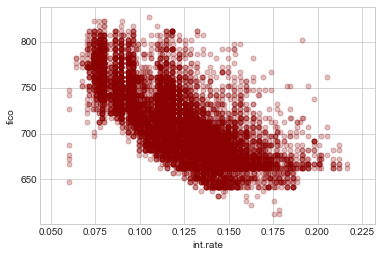

In [5]:
#Creating a scatterplot of fico score versus int.rate
loans.plot.scatter(x='int.rate',y='fico',color="darkred",s=25,alpha=0.25)

# Train and Test Sets

In [6]:
#Creating a fixed larger dataframe that has new feature columns with dummy variables 
cat_feats = ['purpose']
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [7]:
#Split the data into training and test sets
x = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# Building the Model

In [8]:
#Using the svc() function to train a model
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
#Model Evaluation
predictions = model.predict(x_test)
print('confusion_matrix')
print(confusion_matrix(y_test,predictions))
print('\n classification_report')
print(classification_report(y_test,predictions))

confusion_matrix
[[2431    0]
 [ 443    0]]

 classification_report
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874



C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Tuning the Model

In [10]:
#Gridsearch
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=10)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................
[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.8372093023255814, total=   0.8s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=0.0001, kernel=rbf ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  C=0.0001, gamma=0.0001, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s remaining:    0.0s


[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.8372093023255814, total=   0.8s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=0.001, kernel=rbf ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s remaining:    0.0s


[CV]  C=0.0001, gamma=0.001, kernel=rbf, score=0.8375111906893464, total=   1.1s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.9s remaining:    0.0s


[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.8372093023255814, total=   0.9s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.4s remaining:    0.0s


[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=0.01, kernel=rbf ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.9s remaining:    0.0s


[CV]  C=0.0001, gamma=0.01, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.3s remaining:    0.0s


[CV]  C=0.0001, gamma=0.1, kernel=rbf, score=0.8372093023255814, total=   0.8s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.1, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV]  C=0.0001, gamma=0.1, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV]  C=0.0001, gamma=1, kernel=rbf, score=0.8372093023255814, total=   0.8s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV]  C=0.0001, gamma=1, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV]  C=0.0001, gamma=1, kernel=rbf, score=0.8375111906893464, total=   0.8s
[CV] C=0.0001, gamma=10, kernel=rbf ..................................
[CV]  C=0.0001, gamma=10, kernel=rbf, score=0.8372093023255814, total=   0.8s
[CV] C=0.0001, gamma=10, ker

[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.8375111906893464, total=   2.4s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.8375111906893464, total=   2.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.8372093023255814, total=   2.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.8375111906893464, total=   2.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV]  C=0.01, gamma=1, kernel=rbf, score=0.8375111906893464, total=   2.4s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.8372093023255814, total=   2.5s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=0.8375111906893464, total=   2.4s
[CV] C=0.01, gamma=10, kernel=rbf .........

[CV]  C=1, gamma=1, kernel=rbf, score=0.8372093023255814, total=   2.7s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.8375111906893464, total=   3.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.8375111906893464, total=   3.5s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.8372093023255814, total=   3.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.8375111906893464, total=   2.7s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.8375111906893464, total=   3.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV]  C=1, gamma=100, kernel=rbf, score=0.8372093023255814, total=   2.7s
[CV] C=1, gamma=100, kernel=rbf .................................

[CV]  C=100, gamma=1, kernel=rbf, score=0.8375111906893464, total=   2.9s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.8372093023255814, total=   3.3s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.8375111906893464, total=   3.8s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV]  C=100, gamma=10, kernel=rbf, score=0.8375111906893464, total=   3.3s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV]  C=100, gamma=100, kernel=rbf, score=0.8372093023255814, total=   3.8s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV]  C=100, gamma=100, kernel=rbf, score=0.8375111906893464, total=   3.6s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV]  C=100, gamma=100, kernel=rbf, score=0.8375111906893464, total=   2.9s
[CV] C=100, gamma=1000, kernel=rbf ............

[CV]  C=10000, gamma=10, kernel=rbf, score=0.8375111906893464, total=   2.9s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV]  C=10000, gamma=10, kernel=rbf, score=0.8375111906893464, total=   3.0s
[CV] C=10000, gamma=100, kernel=rbf ..................................
[CV]  C=10000, gamma=100, kernel=rbf, score=0.8372093023255814, total=   3.6s
[CV] C=10000, gamma=100, kernel=rbf ..................................
[CV]  C=10000, gamma=100, kernel=rbf, score=0.8375111906893464, total=   3.0s
[CV] C=10000, gamma=100, kernel=rbf ..................................
[CV]  C=10000, gamma=100, kernel=rbf, score=0.8375111906893464, total=   3.0s
[CV] C=10000, gamma=1000, kernel=rbf .................................
[CV]  C=10000, gamma=1000, kernel=rbf, score=0.8372093023255814, total=   2.9s
[CV] C=10000, gamma=1000, kernel=rbf .................................
[CV]  C=10000, gamma=1000, kernel=rbf, score=0.8375111906893464, total=   3.2s
[CV] C=10000, gamma=1000, ke

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 16.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [11]:
#Model Evaluation
predictions = grid.predict(x_test)
print('confusion_matrix')
print(confusion_matrix(y_test,predictions))
print('\n classification_report')
print(classification_report(y_test,predictions))

confusion_matrix
[[2431    0]
 [ 443    0]]

 classification_report
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874



C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### We got some bad results! 
### With the model classifying everything into one group! 

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

predictions = dtree.predict(x_test)

print('confusion_matrix')
print(confusion_matrix(y_test,predictions))
print('\n')
print('classification_report')
print(classification_report(y_test,predictions))

confusion_matrix
[[2002  429]
 [ 341  102]]


classification_report
             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874

